# Stock Market Prediction

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('TATAMTR.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,39.744202,41.631699,39.744202,41.535900,13.432802,3528278.0
1,04-01-2000,41.583801,41.967098,39.475899,39.897499,12.902940,3544397.0
2,05-01-2000,37.176300,41.737099,37.176300,40.865200,13.215897,5849541.0
3,06-01-2000,41.200600,44.055901,41.200600,42.561199,13.764388,10274967.0
4,07-01-2000,42.925301,45.972198,42.752800,45.972198,14.867510,11477452.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4681,27-08-2018,257.000000,259.50,256.500000,258.799988,258.799988,6127707.0
4682,28-08-2018,261.700012,263.25,259.049988,260.000000,260.000000,8506857.0
4683,29-08-2018,261.049988,263.50,261.000000,261.700012,261.700012,5117552.0
4684,30-08-2018,262.299988,263.00,259.000000,259.350006,259.350006,6333570.0
4685,31-08-2018,259.100006,268.25,258.100006,267.500000,267.500000,12360023.0


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: >

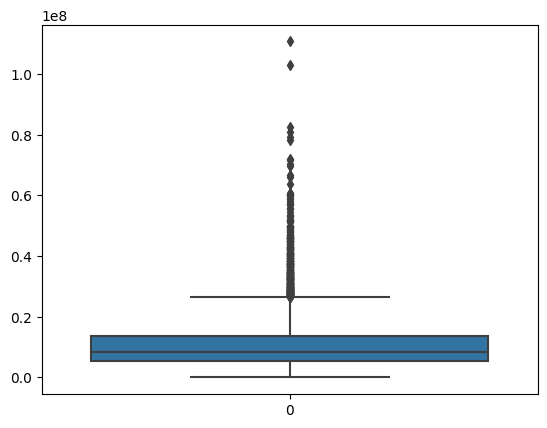

In [6]:
import seaborn as sns
sns.boxplot(df['Volume'])

In [7]:
columns_list = ['Close']  # Replace column1, column2, column3 with your column names
df.dropna(subset=columns_list, inplace=True)

In [8]:
df1=df.reset_index()['Close']

In [9]:
df1.shape

(4625,)

In [10]:
df1

0        41.535900
1        39.897499
2        40.865200
3        42.561199
4        45.972198
           ...    
4620    258.799988
4621    260.000000
4622    261.700012
4623    259.350006
4624    267.500000
Name: Close, Length: 4625, dtype: float64

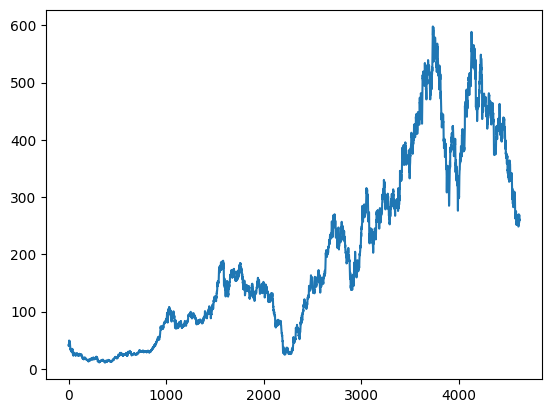

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

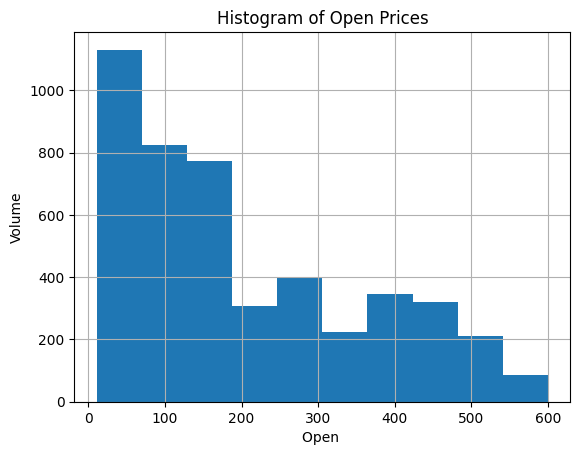

In [12]:
df['Open'].hist()
plt.title('Histogram of Open Prices')
plt.xlabel('Open ')
plt.ylabel('Volume')
plt.show()


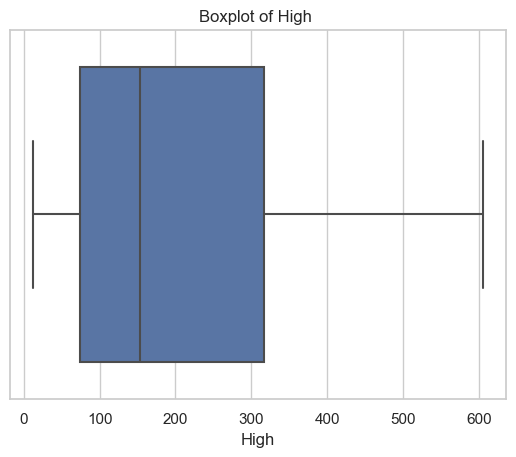

In [33]:
sns.boxplot(x='High', data=df)
plt.title('Boxplot of High ')
plt.show()


In [14]:
import numpy as np

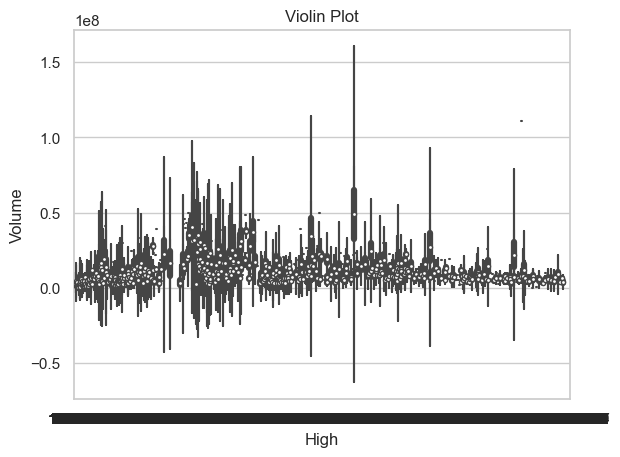

In [15]:
sns.set(style="whitegrid")
palette = sns.color_palette("muted")
sns.violinplot(x='High', y='Volume', data=df)
plt.title('Violin Plot')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1

array([[0.05157565],
       [0.04878387],
       [0.0504328 ],
       ...,
       [0.42672788],
       [0.42272354],
       [0.43661086]])

In [18]:
df1.shape

(4625, 1)

In [19]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size,test_size

(3006, 1619)

In [21]:
len(train_data),len(test_data)

(3006, 1619)

In [22]:
train_data

array([[0.05157565],
       [0.04878387],
       [0.0504328 ],
       ...,
       [0.39628651],
       [0.39830911],
       [0.4052204 ]])

In [23]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [24]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,ytest = create_dataset(test_data,time_step)

In [25]:
print(X_train.shape),print(y_train.shape)

(2905, 100)
(2905,)


(None, None)

In [26]:
print(X_test.shape),print(ytest.shape)

(1518, 100)
(1518,)


(None, None)

In [27]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [28]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [29]:
###Create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\gurno\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 262ms/step - loss: 0.0083 - val_loss: 0.0038
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - loss: 2.7583e-04 - val_loss: 0.0035
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - loss: 2.1883e-04 - val_loss: 0.0043
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 2.2870e-04 - val_loss: 0.0027
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - loss: 2.1096e-04 - val_loss: 0.0052
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - loss: 1.8292e-04 - val_loss: 0.0024
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 1.6327e-04 - val_loss: 0.0020
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - loss: 1.5617e-04 - val_loss: 0.0026
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 169ms/step - loss: 1.5533e-04 - val_loss: 0.0024
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - loss: 1.3519e-04 - val_loss: 0.0019
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 1.4576e-04 - val_loss: 0.001

Epoch 65/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - loss: 3.8021e-05 - val_loss: 3.5191e-04
Epoch 66/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - loss: 4.9667e-05 - val_loss: 2.9498e-04
Epoch 67/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 203ms/step - loss: 4.3179e-05 - val_loss: 6.8336e-04
Epoch 68/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - loss: 3.3709e-05 - val_loss: 6.6097e-04
Epoch 69/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - loss: 3.2425e-05 - val_loss: 2.7147e-04
Epoch 70/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - loss: 4.0878e-05 - val_loss: 3.9173e-04
Epoch 71/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step - loss: 3.6274e-05 - val_loss: 3.4005e-04
Epoch 72/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - loss: 3.6116e-05 - val_loss: 6.3097e-04
Epoch 73/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - loss: 2.9912e-05 - val_loss: 3.2380e-04
Epoch 74/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - loss: 3.1900e-05 - val_loss: 4.7320e-04
Epoch 75/100
46/46 ━━━━━━━━━━━━━━━━━

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 3.3542e-05 - val_loss: 6.5569e-04
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 3.3017e-05 - val_loss: 7.5259e-04
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 3.0151e-05 - val_loss: 5.2209e-04
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 2.8853e-05 - val_loss: 0.0013
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 4.0505e-05 - val_loss: 5.3730e-04
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 2.8118e-05 - val_loss: 5.4374e-04
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 2.8459e-05 - val_loss: 4.6290e-04
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 3.3380e-05 - val_loss: 8.2543e-04
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 3.5694e-05 - val_loss: 7.3836e-04
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 2.9780e-05 - val_loss: 5.9790e-04
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 3

46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 3.1272e-05 - val_loss: 0.0011
Epoch 65/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - loss: 3.3580e-05 - val_loss: 6.3235e-04
Epoch 66/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 2.8406e-05 - val_loss: 7.1578e-04
Epoch 67/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - loss: 3.1734e-05 - val_loss: 3.9623e-04
Epoch 68/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - loss: 2.9332e-05 - val_loss: 5.7756e-04
Epoch 69/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - loss: 3.5714e-05 - val_loss: 7.8388e-04
Epoch 70/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - loss: 3.5051e-05 - val_loss: 0.0013
Epoch 71/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - loss: 3.7618e-05 - val_loss: 5.9582e-04
Epoch 72/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - loss: 2.7678e-05 - val_loss: 7.2766e-04
Epoch 73/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - loss: 2.7038e-05 - val_loss: 7.7122e-04
Epoch 74/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - loss:

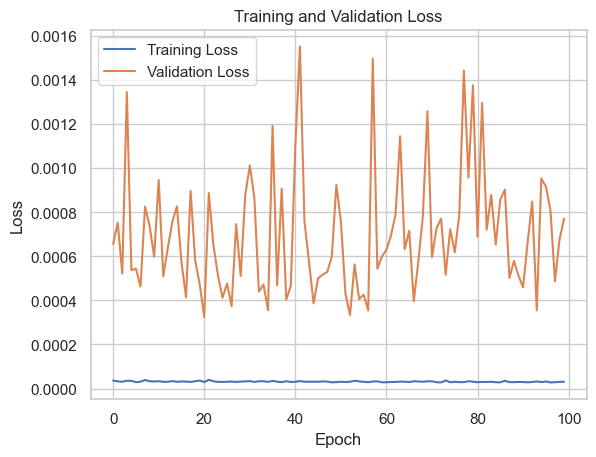

In [58]:
history = model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [35]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

119.18361935750798

In [37]:
math.sqrt(mean_squared_error(ytest,test_predict))

400.6592555097295

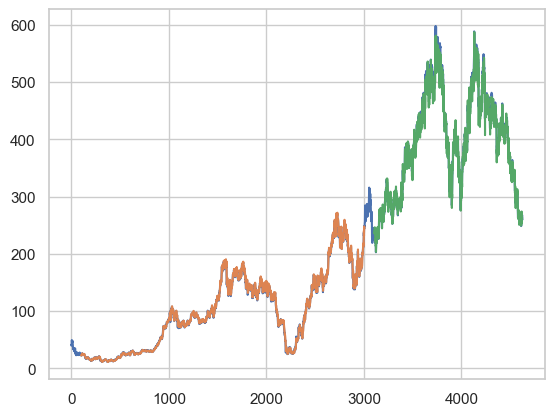

In [38]:
look_back = 100

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1)) 
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

1619

In [40]:
x_input=test_data[1519:].reshape(1,-1)
x_input.shape

(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.5870710617600671,
 0.5915013843226569,
 0.5892010196152556,
 0.5587000333527544,
 0.5540993550569405,
 0.5512877697929008,
 0.5503506087842134,
 0.5533325497814773,
 0.5500097950797878,
 0.5457498793694109,
 0.5407232095025593,
 0.5435347436476103,
 0.5548661092134152,
 0.560829991207943,
 0.5534177276480894,
 0.5490726340711003,
 0.5506061935030383,
 0.5518841682161514,
 0.546772269363699,
 0.5634711696197697,
 0.5492430409233131,
 0.5444719046562978,
 0.5322033780818054,
 0.5091998332457699,
 0.5094554179645948,
 0.5173788509620982,
 0.49982801868294074,
 0.4850034915632336,
 0.5051103243876058,
 0.5080922653848696,
 0.4726497360031405,
 0.4820215505659697,
 0.4856850678530961,
 0.48287353370804514,
 0.47307572757417815,
 0.46217035357941094,
 0.470179015562515,
 0.46924180343483896,
 0.46634509142317576,
 0.48457749999219585,
 0.5011911712626659,
 0.5089442485269451,
 0.5086034348225195,
 0.50528068012083,
 0.5063030701151182,
 0.5020431544047412,
 0.49701648453788966,
 0.5069846

In [43]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.44355574]
101
1 day input [0.59150138 0.58920102 0.55870003 0.55409936 0.55128777 0.55035061
 0.55333255 0.5500098  0.54574988 0.54072321 0.54353474 0.55486611
 0.56082999 0.55341773 0.54907263 0.55060619 0.55188417 0.54677227
 0.56347117 0.54924304 0.5444719  0.53220338 0.50919983 0.50945542
 0.51737885 0.49982802 0.48500349 0.50511032 0.50809227 0.47264974
 0.48202155 0.48568507 0.48287353 0.47307573 0.46217035 0.47017902
 0.4692418  0.46634509 0.4845775  0.50119117 0.50894425 0.50860343
 0.50528068 0.50630307 0.50204315 0.49701648 0.50698465 0.50059477
 0.50153198 0.50391753 0.50562149 0.47392771 0.45254295 0.44265992
 0.42953941 0.43967798 0.43524771 0.43993361 0.43584405 0.42647224
 0.44231916 0.44683466 0.45015741 0.43712203 0.43422532 0.4299654
 0.41036979 0.420338   0.4099438  0.41105137 0.41258492 0.42170115
 0.42178633 0.42016759 0.42084917 0.43771843 0.43661086 0.43081738
 0.43243612 0.42527949 0.42118998 0.41369252 0.40951781 0.41556687
 0.42016759 0.40696186 0.40457629 

8 day output [[0.46581402]]
9 day input [0.54574988 0.54072321 0.54353474 0.55486611 0.56082999 0.55341773
 0.54907263 0.55060619 0.55188417 0.54677227 0.56347117 0.54924304
 0.5444719  0.53220338 0.50919983 0.50945542 0.51737885 0.49982802
 0.48500349 0.50511032 0.50809227 0.47264974 0.48202155 0.48568507
 0.48287353 0.47307573 0.46217035 0.47017902 0.4692418  0.46634509
 0.4845775  0.50119117 0.50894425 0.50860343 0.50528068 0.50630307
 0.50204315 0.49701648 0.50698465 0.50059477 0.50153198 0.50391753
 0.50562149 0.47392771 0.45254295 0.44265992 0.42953941 0.43967798
 0.43524771 0.43993361 0.43584405 0.42647224 0.44231916 0.44683466
 0.45015741 0.43712203 0.43422532 0.4299654  0.41036979 0.420338
 0.4099438  0.41105137 0.41258492 0.42170115 0.42178633 0.42016759
 0.42084917 0.43771843 0.43661086 0.43081738 0.43243612 0.42527949
 0.42118998 0.41369252 0.40951781 0.41556687 0.42016759 0.40696186
 0.40457629 0.40474669 0.40900661 0.42084917 0.44104118 0.438826
 0.41854881 0.41616326 0.4

16 day output [[0.48769677]]
17 day input [0.55188417 0.54677227 0.56347117 0.54924304 0.5444719  0.53220338
 0.50919983 0.50945542 0.51737885 0.49982802 0.48500349 0.50511032
 0.50809227 0.47264974 0.48202155 0.48568507 0.48287353 0.47307573
 0.46217035 0.47017902 0.4692418  0.46634509 0.4845775  0.50119117
 0.50894425 0.50860343 0.50528068 0.50630307 0.50204315 0.49701648
 0.50698465 0.50059477 0.50153198 0.50391753 0.50562149 0.47392771
 0.45254295 0.44265992 0.42953941 0.43967798 0.43524771 0.43993361
 0.43584405 0.42647224 0.44231916 0.44683466 0.45015741 0.43712203
 0.43422532 0.4299654  0.41036979 0.420338   0.4099438  0.41105137
 0.41258492 0.42170115 0.42178633 0.42016759 0.42084917 0.43771843
 0.43661086 0.43081738 0.43243612 0.42527949 0.42118998 0.41369252
 0.40951781 0.41556687 0.42016759 0.40696186 0.40457629 0.40474669
 0.40900661 0.42084917 0.44104118 0.438826   0.41854881 0.41616326
 0.42178633 0.42383111 0.42672788 0.42272354 0.43661086 0.44355574
 0.44750941 0.449797

25 day output [[0.50653493]]
26 day input [0.49982802 0.48500349 0.50511032 0.50809227 0.47264974 0.48202155
 0.48568507 0.48287353 0.47307573 0.46217035 0.47017902 0.4692418
 0.46634509 0.4845775  0.50119117 0.50894425 0.50860343 0.50528068
 0.50630307 0.50204315 0.49701648 0.50698465 0.50059477 0.50153198
 0.50391753 0.50562149 0.47392771 0.45254295 0.44265992 0.42953941
 0.43967798 0.43524771 0.43993361 0.43584405 0.42647224 0.44231916
 0.44683466 0.45015741 0.43712203 0.43422532 0.4299654  0.41036979
 0.420338   0.4099438  0.41105137 0.41258492 0.42170115 0.42178633
 0.42016759 0.42084917 0.43771843 0.43661086 0.43081738 0.43243612
 0.42527949 0.42118998 0.41369252 0.40951781 0.41556687 0.42016759
 0.40696186 0.40457629 0.40474669 0.40900661 0.42084917 0.44104118
 0.438826   0.41854881 0.41616326 0.42178633 0.42383111 0.42672788
 0.42272354 0.43661086 0.44355574 0.44750941 0.4497973  0.45169258
 0.45378742 0.45633414 0.45930639 0.46253157 0.46581402 0.46900842
 0.47204375 0.4749103

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

4625

In [47]:
df3=df1.tolist()
df3.extend(lst_output)

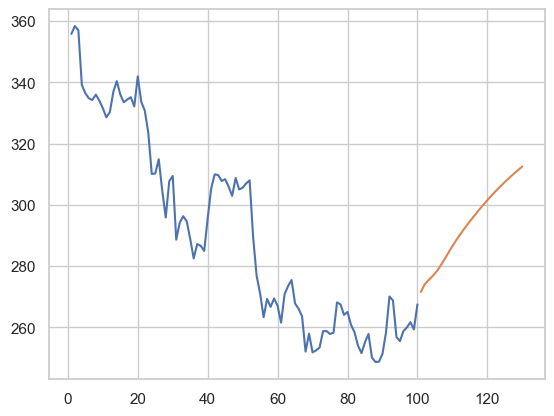

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[4525:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [49]:
df3=scaler.inverse_transform(df3).tolist()

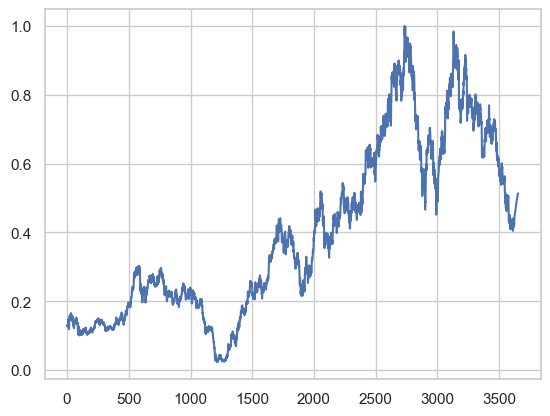

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [51]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(ytest,test_predict)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 391.38107860757316


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(ytest,test_predict)
rmse = mean_squared_error(ytest,test_predict, squared=False)
r2 = r2_score(ytest,test_predict)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R² Score:', r2)

Mean Absolute Error: 391.38107860757316
Mean Squared Error: 160527.8390256107
Root Mean Squared Error: 400.6592555097295
R² Score: -6747036.164222639
